# Question 6

Now consider a qubit decoherence model, $\hat{H} = \hbar\omega\hat{\sigma}_z/2$, where the qubit transition frequency is a Gaussian random variable specified by the expectations

$$ \mathbb{E}[\omega] = \omega_0,\qquad \mathbb{E}[(\omega-\omega_0)^2] = g^2.$$



(a) Consider the evolution starting from the initial state $\hat{\rho}(0) = |+\rangle\langle +|$. Simulate $M=20$ random realisations of the qubit dynamics up to a time $\omega_0 t = 30$, with $g = 0.1\omega_0$. Plot the expectation value $\langle \hat{\sigma}_x\rangle$ as a function of time for each realisation (put them all on one plot). 

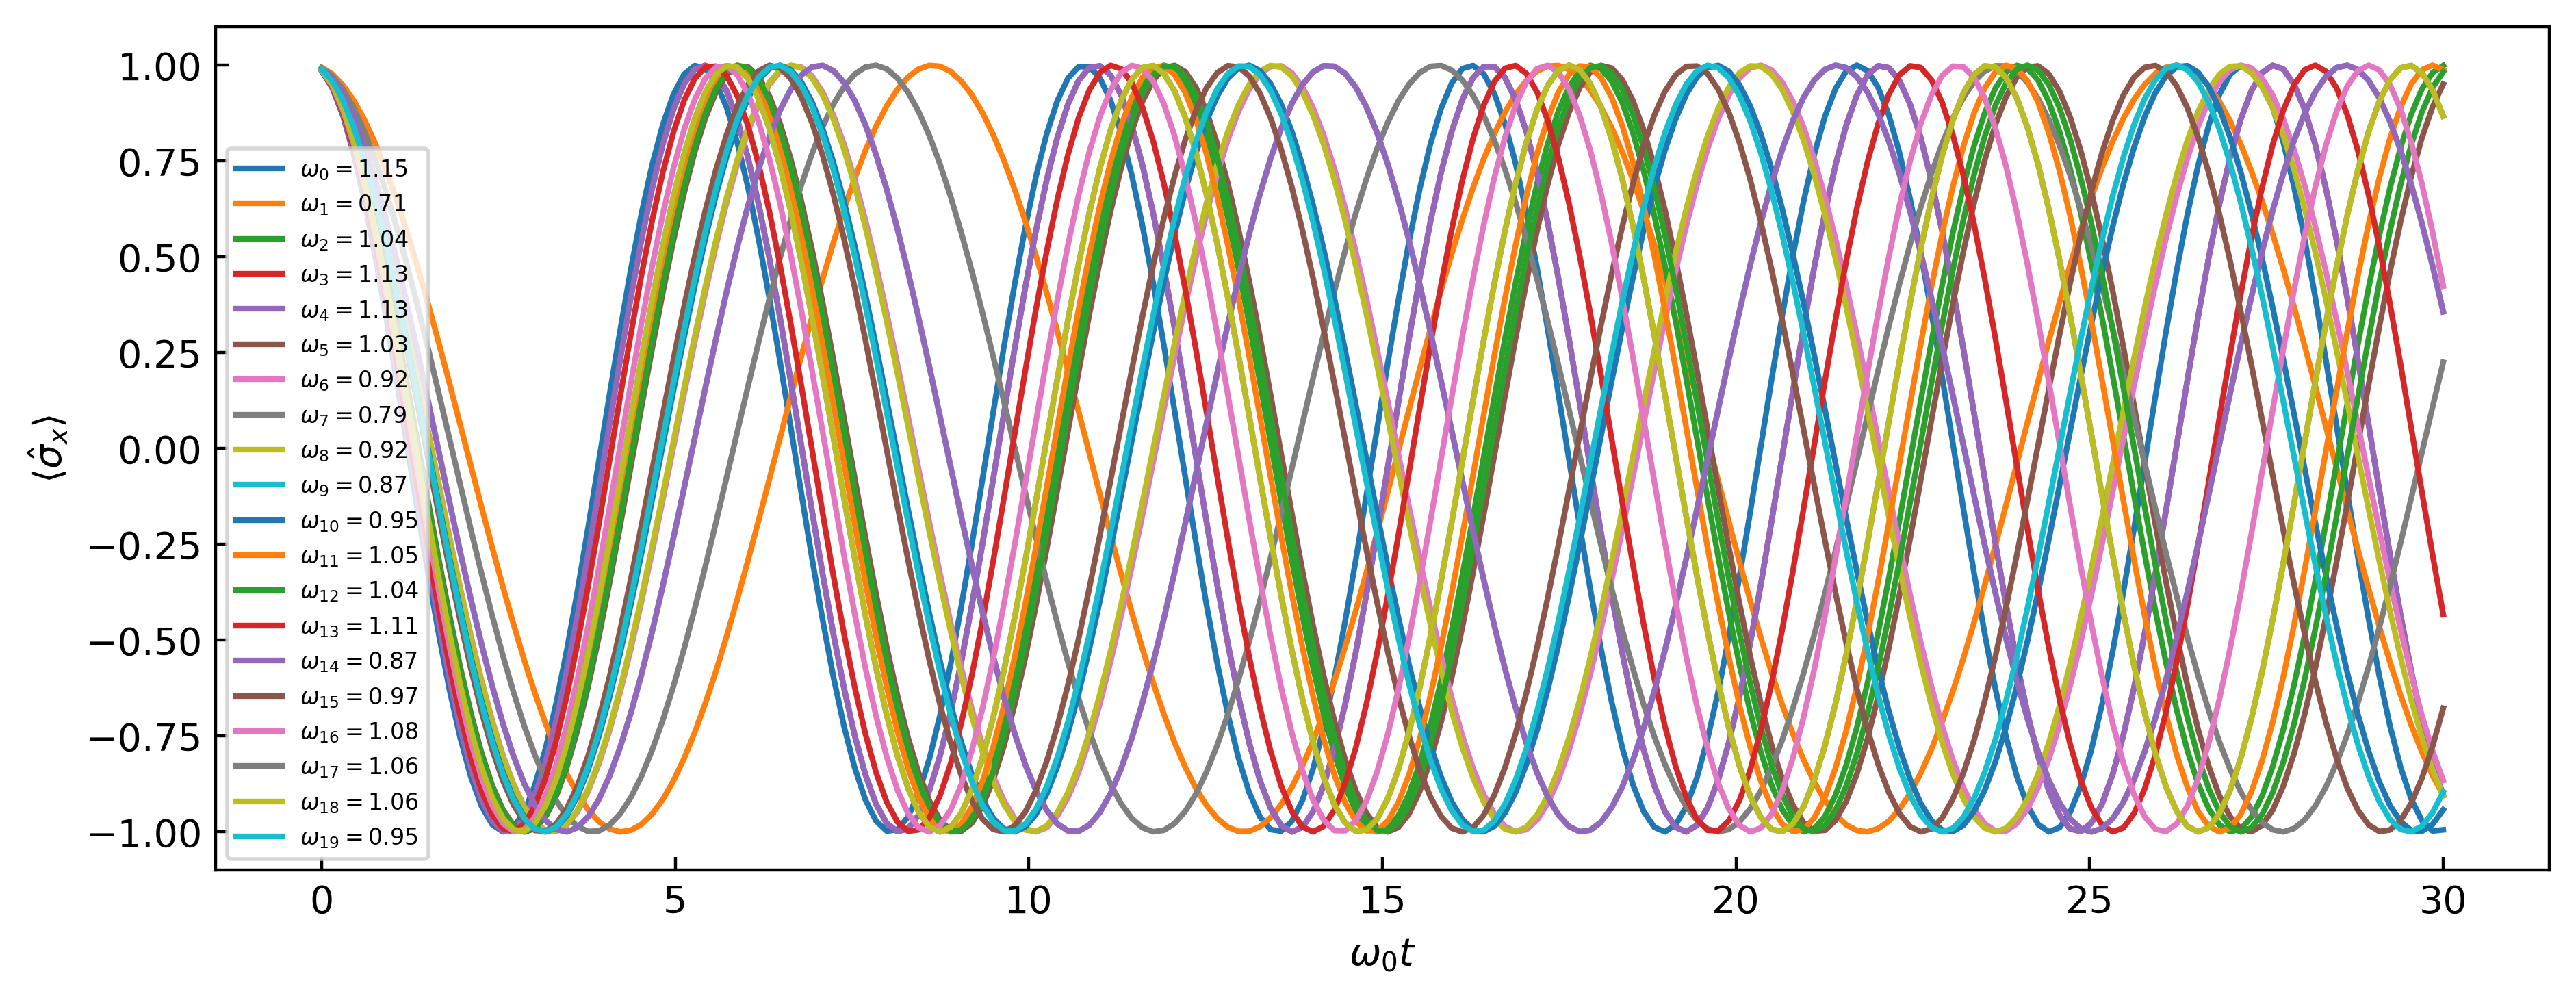

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
#initialize variables
hbar = 1
w0 = 1
g = 0.1*w0
noise_size = 100
w = np.random.normal(w0, g, noise_size)

zero = np.array([[1],[0]])
one = np.array([[0],[1]])

plus = 1/np.sqrt(2) * (zero+one)
rho0 = plus @ plus.T

sig_X = np.array([[0,1],[1,0]])

time_size = 200
t = np.linspace(0, 30*w0, time_size)

def unitary_evolution(w, dt):
    H = hbar * w/2 * np.array([[1,0],[0,-1]])
    Us = expm(-1j * H* dt / hbar)
    return Us

#random frequency is chosen from list with normally distributed frequences initialized
#then use time evo operator for fixed time step is created and state is evoled
#expectation values of sigma X are stored in Xs and plotted

plt.figure(figsize = (11,4), dpi=400)
plt.tick_params(axis="both", direction="in")
wis = []
#M=20 random roudns
for k in range(20):
    wi = w[np.random.randint(noise_size)]
    wis.append(wi)
    U = unitary_evolution(wi, t[1]-t[0])
    Udagger = U.T.conjugate()
    state = rho0
    Xs = []
    for i in t:
        state = U @ state @ Udagger
        Xs.append(np.trace(state @ sig_X).real)
    plt.plot(t, Xs, label=r'$\omega_{'+str(k)+'}=$'+str(round(wi,2)))
plt.xlabel('$\omega_0t$')
plt.ylabel(r'$\langle\hat{\sigma}_x\rangle$')
plt.legend(fontsize = 6)
plt.show()
# as time evolves, decoherence increases(?) realisation become more unpredicatble


(b) Plot the sample average of $\langle \hat{\sigma}_x\rangle$ from your simulated trajectories. The sample average is defined as

$$\overline{\langle \hat{\sigma}_x\rangle}_{\rm samp} = \frac{1}{M} \sum_{m=1}^M \langle \hat{\sigma}_x\rangle_m,$$

where $\langle \hat{\sigma}_x\rangle_m$ is the result for the $m^{\rm th}$ trajectory. How does this compare to what you expect for a very large number of trajectories $M\to\infty$?

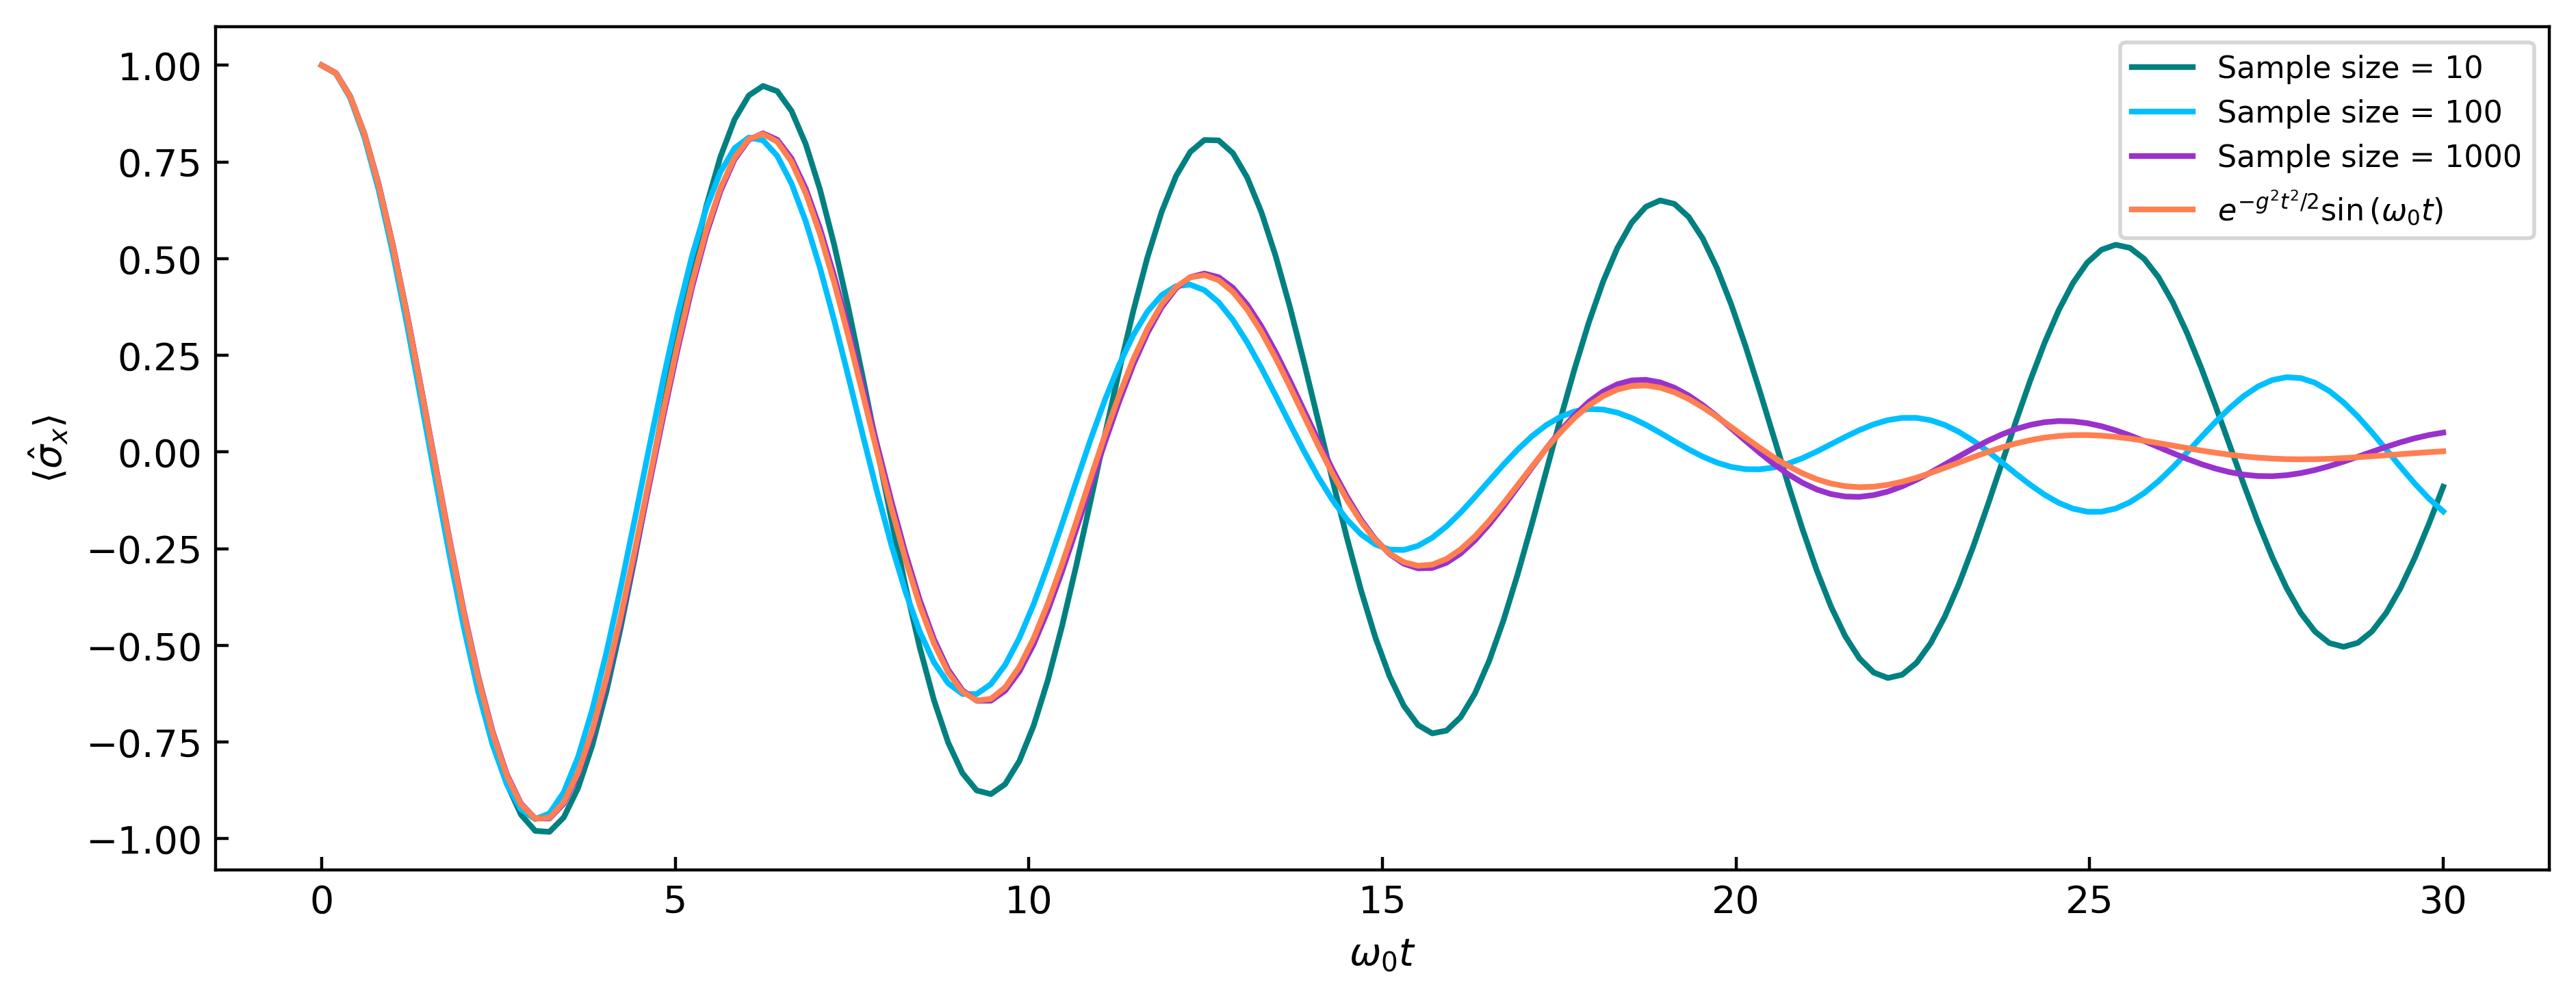

In [8]:
def X_expectation(rho):
    trace = np.trace(rho @ sig_X)
    return trace.real

Xs = [] # store different sample size data to average
dt = t[1]-t[0]
rho = rho0

for k in range(1,4):
    noise_size = 10**k #bigger noise means distribution is closer to the perfect gaussian
    w = np.random.normal(w0, g, noise_size)
    Xi = []
    for i in range(int(10**k)):
        wi = w[np.random.randint(noise_size)]
        Xt = []
        U = unitary_evolution(wi, dt)
        rho = rho0
        for j in t:
            Xt.append(X_expectation(rho))
            rho = U @ rho @ U.T.conjugate()
        Xi.append(Xt)
    Xs.append(Xi)
col = ['teal','deepskyblue','darkorchid']
#initialization of figure
plt.figure(figsize=(11,4),dpi=400)
plt.tick_params(axis="both", direction="in")
#previously computed data is retrieved and averaged
for i in range(len(Xs)):
    plt.plot(t, [np.average([Xs[i][j][k] for j in range(len(Xs[i]))]) for k in range(len(t))], c=col[i], label='Sample size = '+str(10**(i+1)))
plt.plot(t, [np.exp(-g**2*i**2/2) * np.cos(w0*i) for i in t], label=r'$e^{-g^2t^2/2}\sin{(\omega_0t)}$',c='coral')
plt.xlabel('$\omega_0t$')
plt.ylabel(r'$\langle\hat{\sigma}_x\rangle$')
plt.legend(fontsize = 8)
plt.show()

Shown that as amount of trajectories (M) increases, the function converges towards the analytical expected value for $M -> \infty$